In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from pandas_datareader import data as pdr
import yfinance as yf

from universal import algos
from universal.algo import Algo
from universal.algos import *


sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (16, 8)

# ignore logged warnings
import logging
logging.getLogger().setLevel(logging.ERROR)

In [2]:
data = yf.download(["META", "AMZN", "AAPL", "NFLX", "GOOG"], start="2019-06-02", end="2024-06-02")
# data = yf.download(["META", "AMZN", "NFLX", "GOOG"], start="2019-06-02", end="2024-06-02")
adj_close = data["Adj Close"]
data.head()

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                \
Ticker           AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2019-06-03  41.812847  84.634499  51.811501  163.976013  336.630005   
2019-06-04  43.342514  86.477997  52.652500  167.322464  353.399994   
2019-06-05  44.042217  86.925003  52.111000  167.991760  355.730011   
2019-06-06  44.688828  87.718002  52.216999  168.151596  357.130005   
2019-06-07  45.878311  90.201500  53.301998  173.166275  360.869995   

Price           Close                                                ...  \
Ticker           AAPL       AMZN       GOOG        META        NFLX  ...   
Date                                                                 ...   
2019-06-03  43.325001  84.634499  51.811501  164.149994  336.630005  ...   
2019-06-04  44.910000  86.477997  52.652500  167.500000  353.399994  ...   
2019-06-05  45.634998  86.925003  52.111000  168.169998  355.730011  ...   
2019-06-06  46.305000  87.718002  52.216999  168.330002  357.130005  ...   
2019-06-07  47.537498  90.201500  53.301998  173.350006  360.869995  ...   

Price            Open                                                \
Ticker           AAPL       AMZN       GOOG        META        NFLX   
Date                                                                  
2019-06-03  43.900002  88.000504  53.275002  175.000000  343.559998   
2019-06-04  43.860001  84.961998  52.145000  163.710007  345.000000   
2019-06-05  46.070000  87.480003  52.577000  167.479996  354.380005   
2019-06-06  45.770000  86.885498  52.249500  168.300003  354.839996   
2019-06-07  46.627499  88.184998  52.531502  170.169998  357.390015   

Price          Volume                                           
Ticker           AAPL       AMZN       GOOG      META     NFLX  
Date                                                            
2019-06-03  161584400  181974000  102612000  56059600  7849600  
2019-06-04  123872000  113582000   56670000  46044300  7891600  
2019-06-05  119093600   84796000   43368000  19758300  5020100  
2019-06-06   90105200   73786000   34064000  12446400  3710000  
2019-06-07  122737600   96164000   36048000  16917300  4777300  

[5 rows x 30 columns]

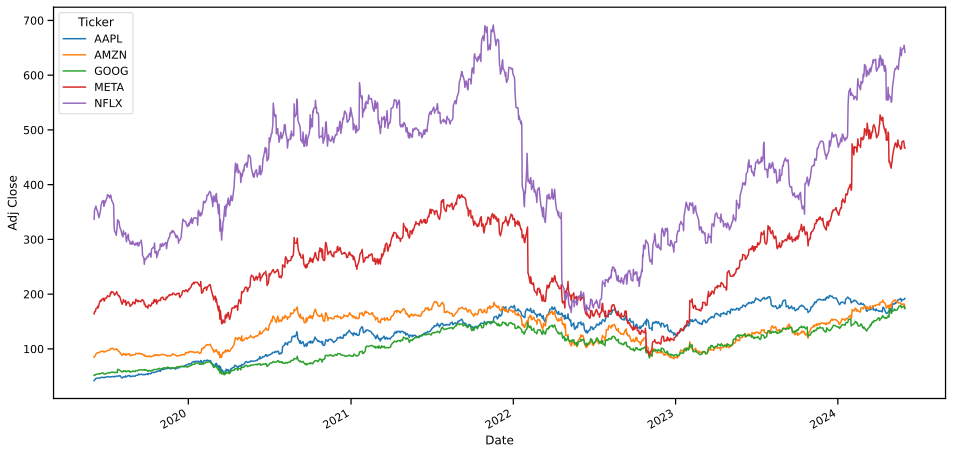

In [3]:
adj_close.plot()
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

In [4]:
class Random(Algo):
    """Draw the weights from a uniform Dirichlet distribution"""
    PRICE_TYPE = "ratio"

    def __init__(self, seed):
        super().__init__()
        self.rng = np.random.default_rng(seed)

    def step(self, x, last_b, history=None):
        d = len(x)
        w = self.rng.dirichlet(np.ones(d))
        return w
    
class AllIn(Algo):
    """Uniformly randomly all in >:)"""
    PRICE_TYPE = "ratio"

    def __init__(self, seed):
        super().__init__()
        self.rng = np.random.default_rng(seed)

    def step(self, x, last_b, history=None):
        d = len(x)
        idx = self.rng.choice(np.arange(d))
        w = np.zeros(d)
        w[idx] = 1
        return w

Summary:
    Profit factor: 1.19
    Sharpe ratio: 1.12 ± 0.57
    Ulcer index: 3.20
    Information ratio (wrt benchmark): 0.37
    Benchmark sharpe: 0.92 ± 0.53
    Appraisal ratio (wrt benchmark): 0.64 ± 0.45
    Beta / Alpha: 0.82 / 12.507%
    Annualized return: 35.56%
    Annualized volatility: 31.67%
    Longest drawdown: 354 days
    Max drawdown: 31.43%
    Winning days: 53.1%
    Annual turnover: 0.0
        


c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


<Axes: xlabel='Date'>

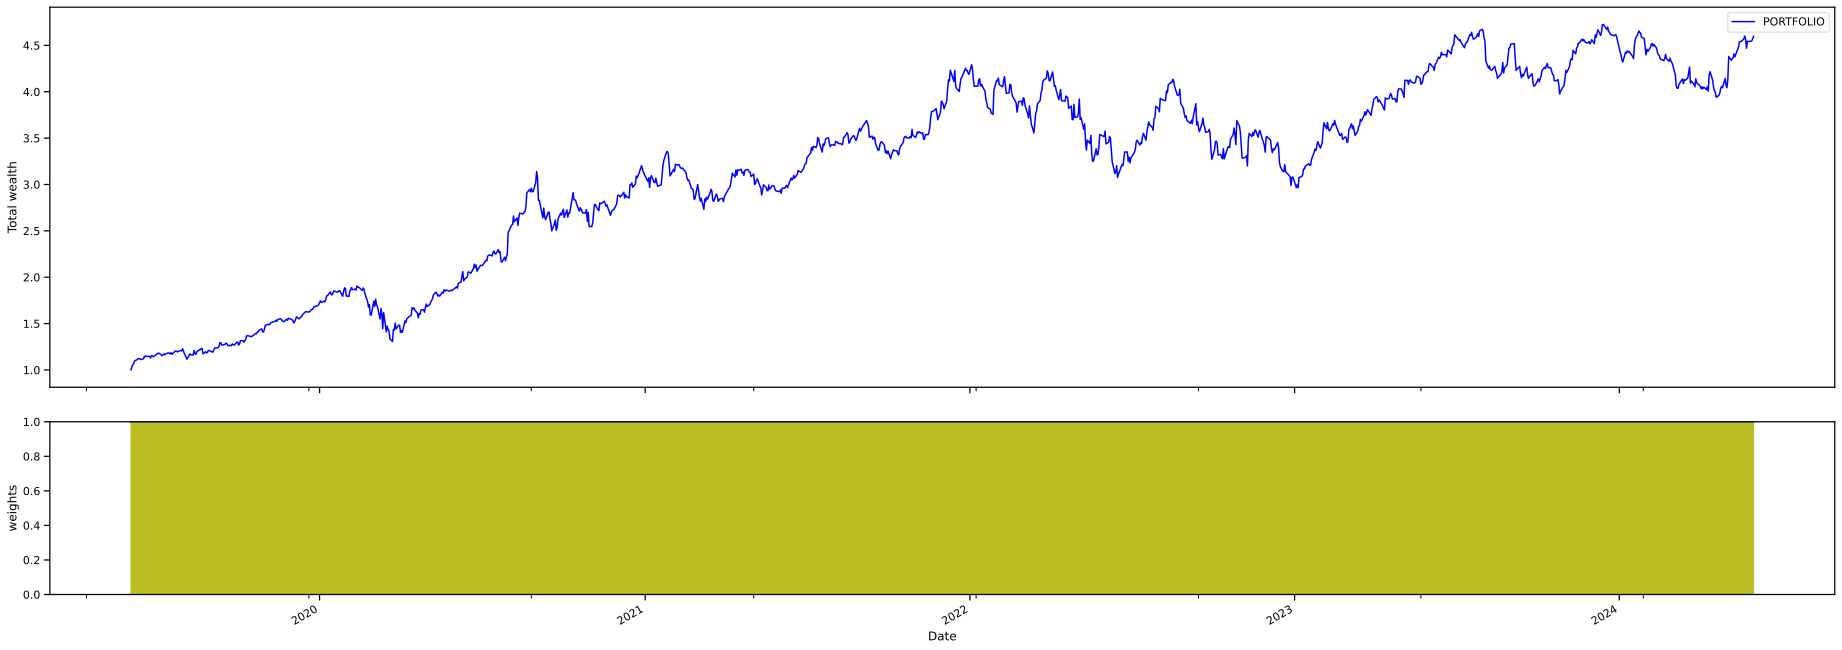

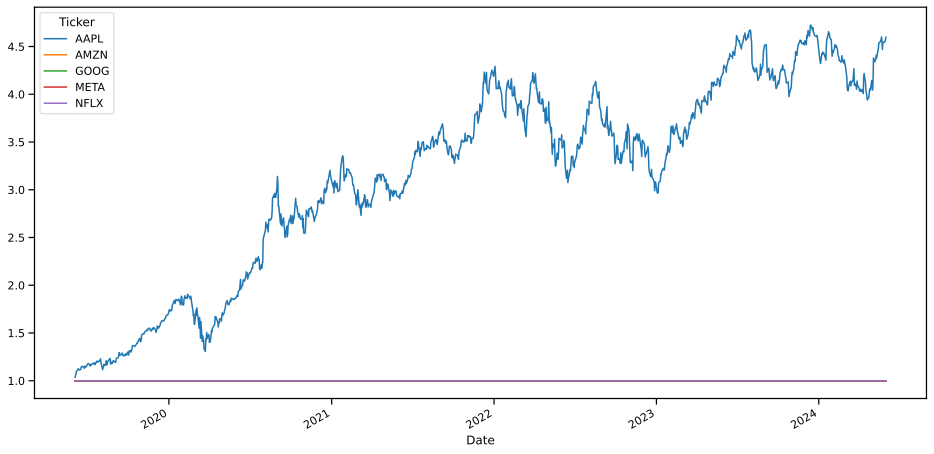

In [5]:
BCRP_algo = algos.BCRP()
BCRP_result = BCRP_algo.run(adj_close)

print(BCRP_result.summary())
BCRP_result.plot(assets=False)
BCRP_result.plot_decomposition()

Summary:
    Profit factor: 1.15
    Sharpe ratio: 0.92 ± 0.53
    Ulcer index: 1.45
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.92 ± 0.53
    Appraisal ratio (wrt benchmark): 0.00 ± 0.53
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 28.11%
    Annualized volatility: 30.50%
    Longest drawdown: 520 days
    Max drawdown: 49.94%
    Winning days: 56.3%
    Annual turnover: 2.4
        


c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


<Axes: xlabel='Date'>

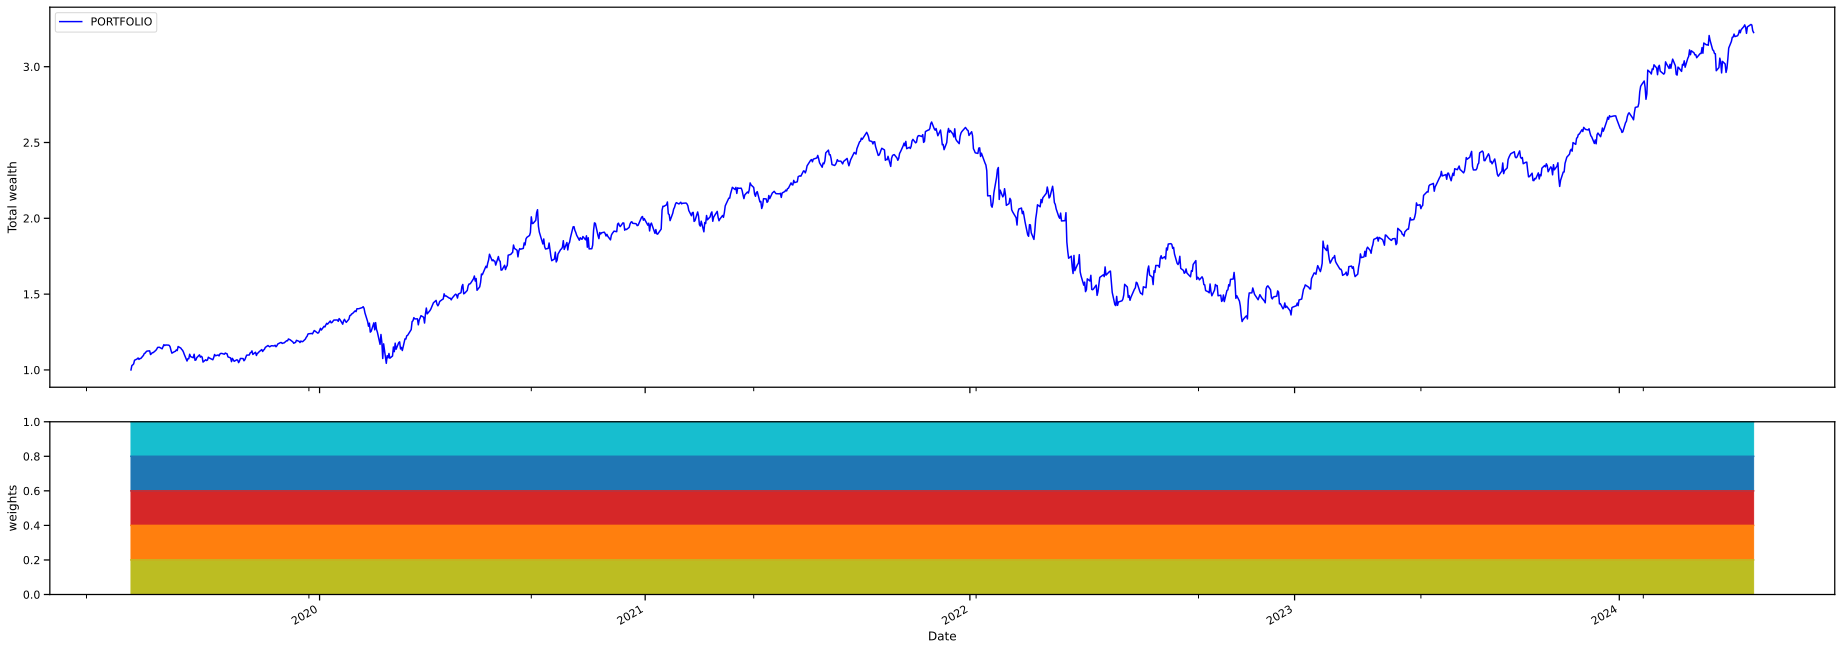

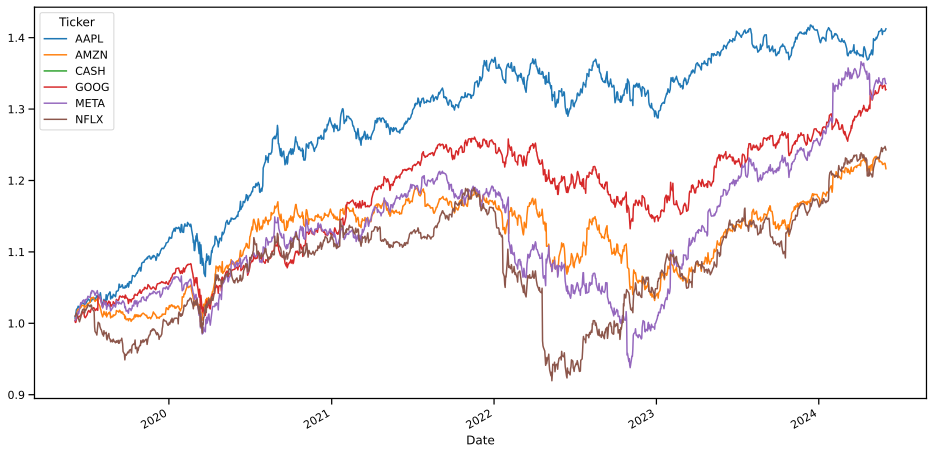

In [6]:
CRP_algo = algos.CRP()
CRP_result = CRP_algo.run(adj_close)

print(CRP_result.summary())
CRP_result.plot(assets=False)
CRP_result.plot_decomposition()

c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")


Summary:
    Profit factor: 1.14
    Sharpe ratio: 0.92 ± 0.53
    Ulcer index: 1.45
    Information ratio (wrt benchmark): -0.47
    Benchmark sharpe: 0.92 ± 0.53
    Appraisal ratio (wrt benchmark): -0.11 ± 0.45
    Beta / Alpha: 0.99 / -0.101%
    Annualized return: 27.71%
    Annualized volatility: 30.19%
    Longest drawdown: 521 days
    Max drawdown: 49.07%
    Winning days: 56.0%
    Annual turnover: 1.9
        


c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


<Axes: xlabel='Date'>

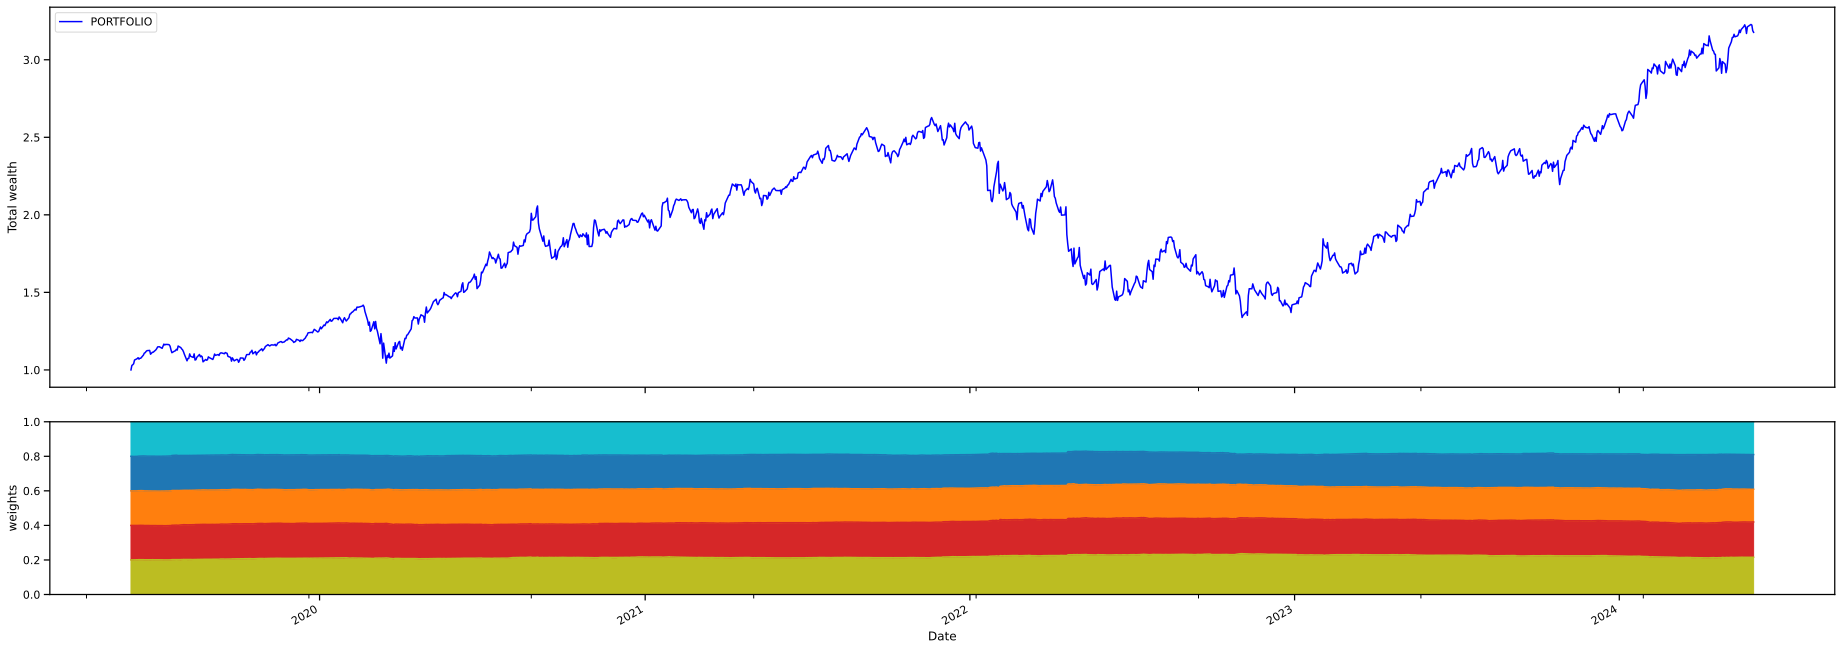

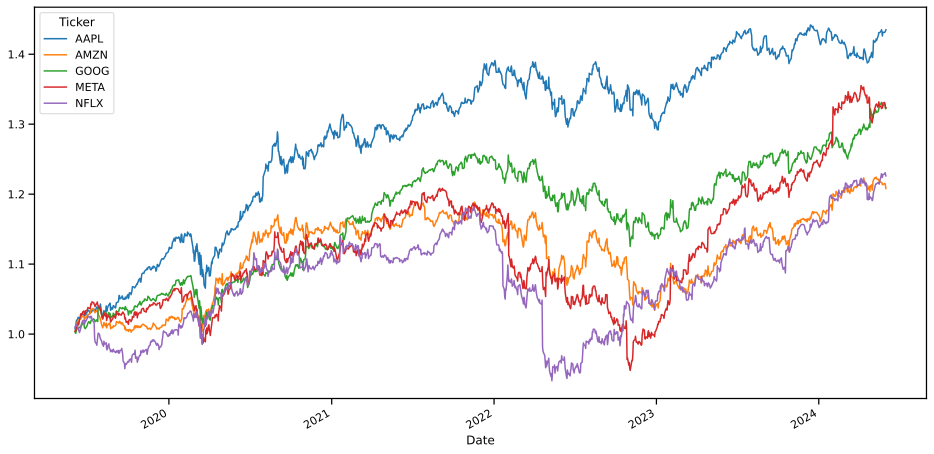

In [7]:
UP_algo = algos.UP(eval_points=1e6)
UP_result = UP_algo.run(adj_close)

print(UP_result.summary())
UP_result.plot(assets=False)
UP_result.plot_decomposition()

c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


Summary:
    Profit factor: 1.14
    Sharpe ratio: 0.89 ± 0.53
    Ulcer index: 1.46
    Information ratio (wrt benchmark): 0.09
    Benchmark sharpe: 0.92 ± 0.53
    Appraisal ratio (wrt benchmark): 0.05 ± 0.45
    Beta / Alpha: 1.01 / 0.455%
    Annualized return: 28.92%
    Annualized volatility: 32.33%
    Longest drawdown: 551 days
    Max drawdown: 49.68%
    Winning days: 55.5%
    Annual turnover: 221.5
        


<Axes: xlabel='Date'>

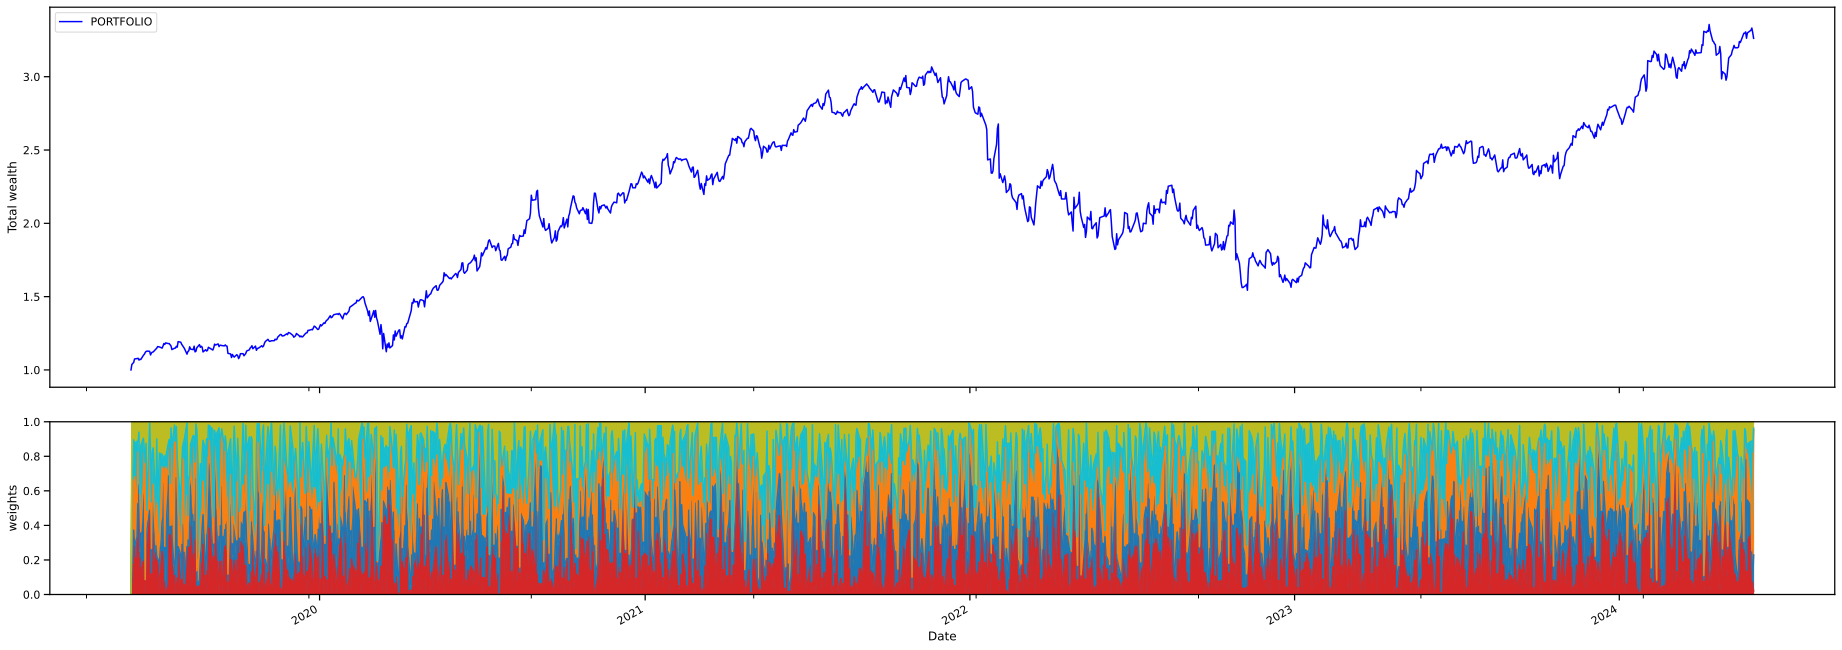

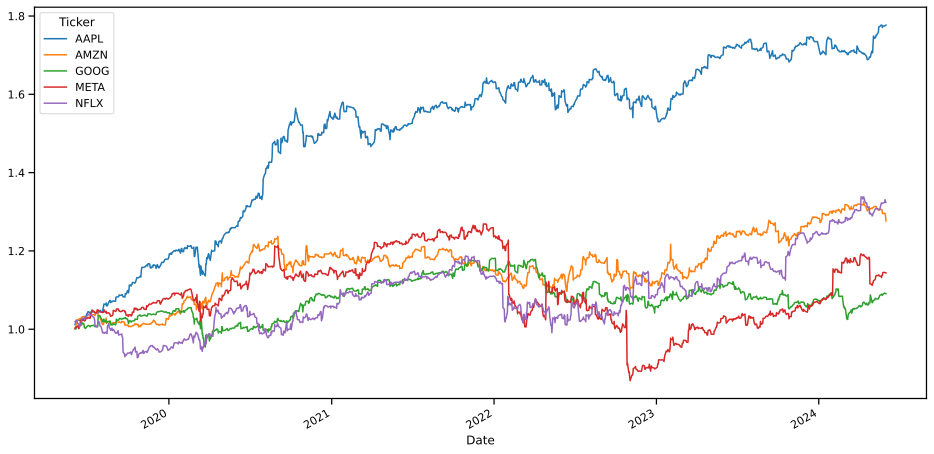

In [8]:
seed = 541

Random_algo = Random(seed)
Random_result = Random_algo.run(adj_close)

print(Random_result.summary())
Random_result.plot(assets=False)
Random_result.plot_decomposition()

c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


Summary:
    Profit factor: 1.08
    Sharpe ratio: 0.61 ± 0.49
    Ulcer index: 0.69
    Information ratio (wrt benchmark): -0.20
    Benchmark sharpe: 0.92 ± 0.53
    Appraisal ratio (wrt benchmark): -0.22 ± 0.45
    Beta / Alpha: 1.02 / -5.063%
    Annualized return: 23.62%
    Annualized volatility: 38.54%
    Longest drawdown: 634 days
    Max drawdown: 76.05%
    Winning days: 52.8%
    Annual turnover: 408.0
        


<Axes: xlabel='Date'>

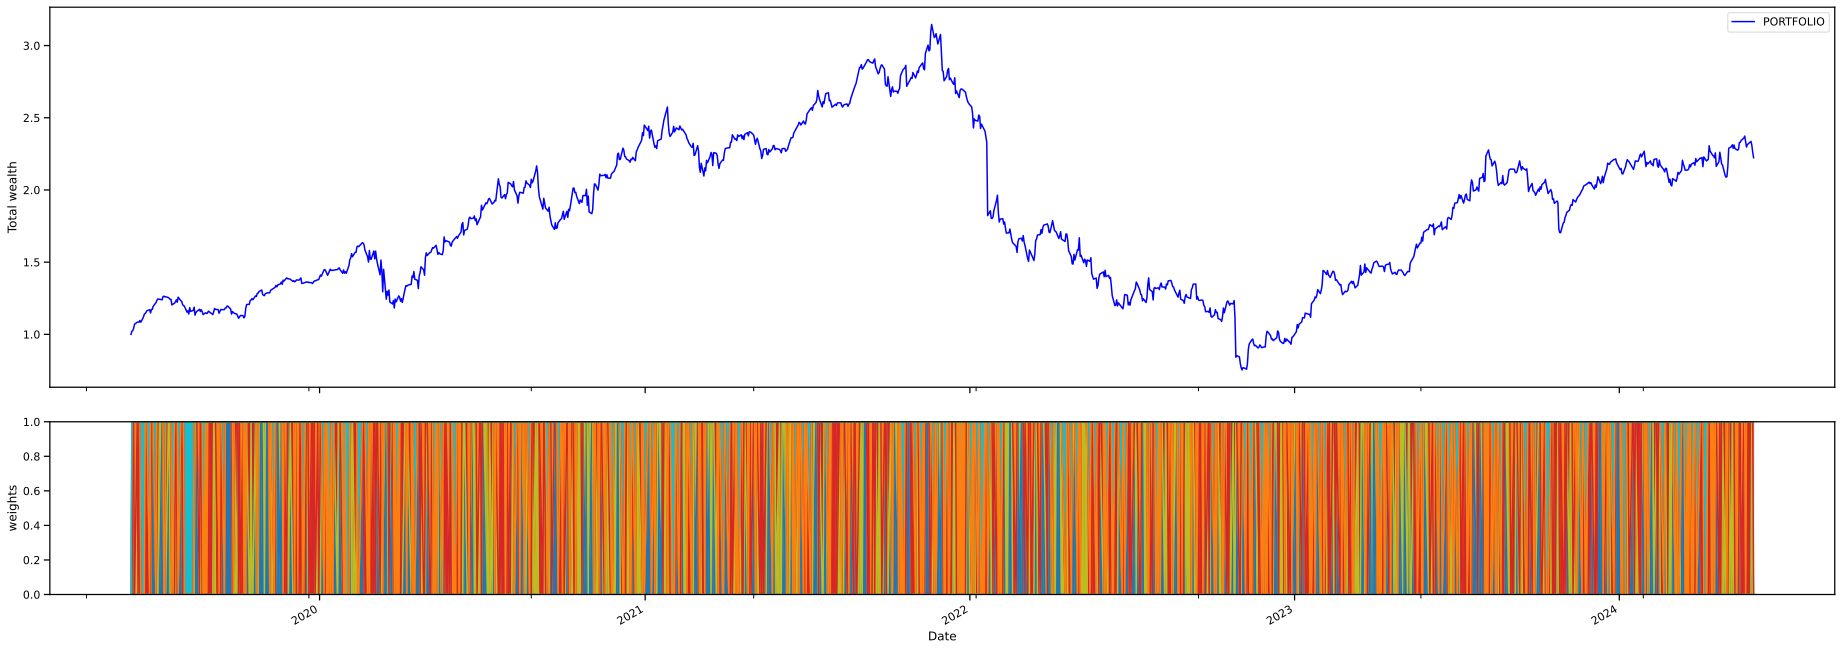

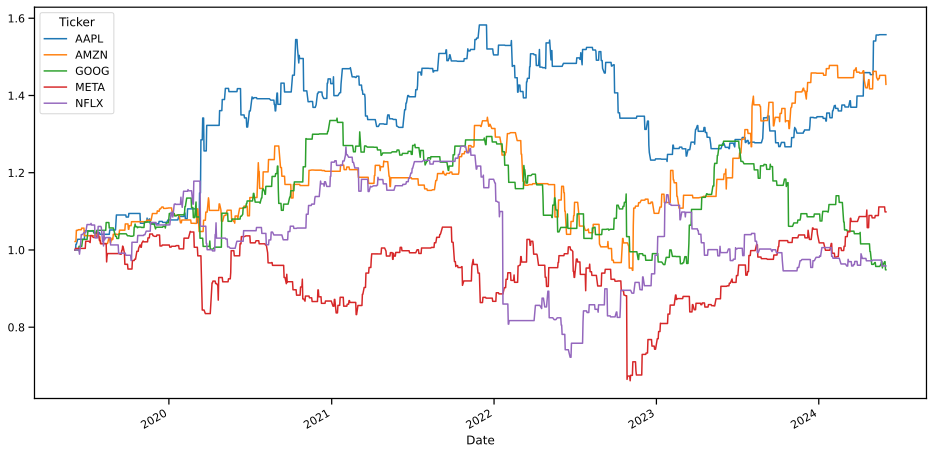

In [9]:
seed = 541

AllIn_algo = AllIn(seed)
AllIn_result = AllIn_algo.run(adj_close)

print(AllIn_result.summary())
AllIn_result.plot(assets=False)
AllIn_result.plot_decomposition()

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_41168\2575322533.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


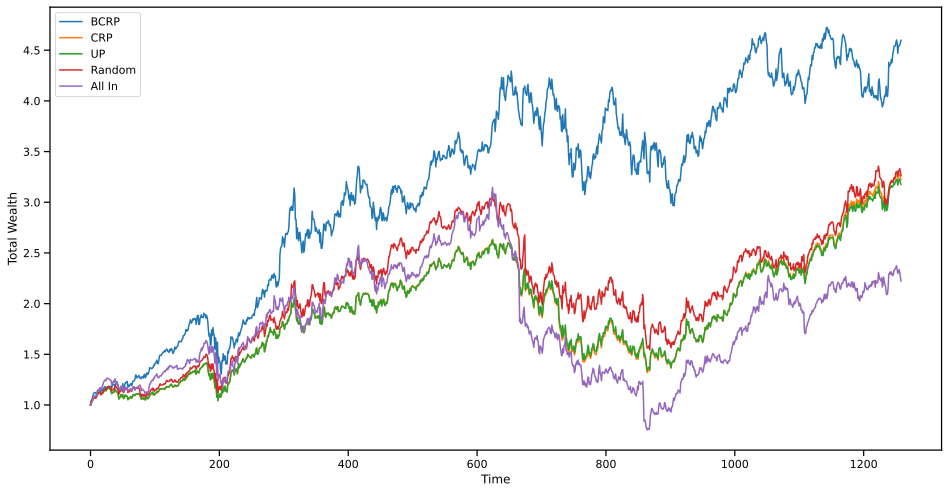

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(BCRP_result.equity)), BCRP_result.equity, label="BCRP")
ax.plot(np.arange(len(CRP_result.equity)), CRP_result.equity, label="CRP")
ax.plot(np.arange(len(UP_result.equity)), UP_result.equity, label="UP")
ax.plot(np.arange(len(Random_result.equity)), Random_result.equity, label="Random")
ax.plot(np.arange(len(AllIn_result.equity)), AllIn_result.equity, label="All In")
ax.set_xlabel("Time")
ax.set_ylabel("Total Wealth")
ax.legend()
fig.show()

In [130]:
Random_result.summary()

c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\Wenhao\miniconda3\envs\cse-541\lib\site-packages\universal\algo.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


'Summary:\n    Profit factor: 1.17\n    Sharpe ratio: 1.04 ± 0.55\n    Ulcer index: 1.62\n    Information ratio (wrt benchmark): 0.83\n    Benchmark sharpe: 0.81 ± 0.52\n    Appraisal ratio (wrt benchmark): 0.85 ± 0.45\n    Beta / Alpha: 0.99 / 8.853%\n    Annualized return: 34.83%\n    Annualized volatility: 33.54%\n    Longest drawdown: 501 days\n    Max drawdown: 55.04%\n    Winning days: 54.6%\n    Annual turnover: 216.9\n        '